<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Answer: <!-- Your answers goes here -->

train_1 (6769, 17) data set consists of 6769 entries and 17 columns with 16 features and one target variable.<br>
valid_1 (1693, 17) data set consists of 1693 entries and 17 columns with 16 features and one target variable.<br>
train_2 (28934, 17) data set consists of 28934 entries and 17 columns with 16 features and one target variable.<br>
valid_2 (7234, 17) data set consists of 7234 entries and 17 columns with 16 features and one target variable.
On looking into the data set I found out that the given datasets are in the following ratio:<br>
train:valid = 80%:20%
Output Frequency:<br>
The frequency of the target variable is given as follows:
<br>
train_1.csv yes:Total is 3385/6769 0.500<br>
valid_1.csv yes:total is 846/1693 is 0.499<br>
<br>
train_2.csv yes:Total is 3385/28934 0.116<br>
valid_2.csv yes:Total is 846/7234 is 0.116<br>
<br>
test.csv yes: total is 1058/9043 is 0.116<br>
train_1 and valid1 datasets are balanced for the target variable as its value is 0.5, but train_2.csv and test.csv are imbalanced for output "y"<br>

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Answer for bullet one <br>
The continous values are as follows:<br>
age         
balance     
day         
duration    
campaign    
pdays       
previous    
2.   Answer for bullet two <br>
The categorical features as follows:<br>
job          
marital      
education    
default      
housing      
loan         
contact      
month        
poutcome 

We need to convert the categorical features into continous values.
This can be done by several methods, But I have done the One Hot Encoding because it would reduce the bias, by giving the equal weightage to all the features.

3.   Answer for bullet three
At the outset when we started checking the dataset, I found that there are no missing values, in the sense, there were no "nan" and null values. This is done using the following function:<br>
<br>
print(train1.isnull().sum())<br>
print(train2.isnull().sum())<br>
print(valid1.isnull().sum())<br>
print(valid2.isnull().sum())<br>
print(test.isnull().sum())<br>
When seen in the main dataset, I found that the feature "pdays" is the number of days passed, client was contacted.
But some of the data points are negative. The number of days cannot be negative, which means the data in the "pdays" is not valid.
So when checked, the "-1"s are around.
Inintially I replaced the values of -1 with mean but no improvement in accuracy, then removed the pdays feature still no improvement in the accuracy.
So Finnaly I kept the coloumn as it is as there is no correlation between this feature and the target variable.
<br>
The poutcome, contact, education coloumns have the unknown values.
By one-hot Encoding the unknown values are given equal weightage.




In [67]:
# PROBLEM 1, TASK 1 CODE GOES HERE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Loading the training sets

def preprocess(str1,str2):
    train1 = pd.read_csv(str1)
    valid1 = pd.read_csv(str2)

    #Seperating out the categorical and continous features
    #Selecting only dtype = "object" gives us the categorical variables

    train_cat = train1.select_dtypes(include=['object'])
    train_cont = train1.select_dtypes(include=['int64'])

    valid_cat = valid1.select_dtypes(include = ['object'])
    valid_cont = valid1.select_dtypes(include = ['int64'])
    
    #One Hot Encoding for the training set.
    Categorical_features = train_cat.columns.values.tolist()[0:9]
    train1_one_hot = train1.copy()
    for i in Categorical_features:
        train1_one_hot = pd.get_dummies(train1_one_hot, columns=[i], prefix = [i])

    #One hot encoding for the validation set.
    Categorical_features_valid = valid_cat.columns.values.tolist()[0:9]
    valid1_one_hot = valid1.copy()
    for i in Categorical_features_valid:
        valid1_one_hot = pd.get_dummies(valid1_one_hot, columns=[i], prefix = [i])


    #Normalizing the values of continous variables train set:
    train_cont_norm = (train_cont - train_cont.mean()) / (train_cont.std())
    train1_one_hot_1 = train1_one_hot.iloc[:,7:]
    
    #Concatenating the categorical and continous values
    frames = [train_cont_norm,train1_one_hot_1]
    X = pd.concat(frames, axis = 1)

    #Normalizing the values of continous variables train set:
    valid_cont_norm = (valid_cont - valid_cont.mean())/(valid_cont.std())
    valid1_one_hot_1 =valid1_one_hot.iloc[:,7:]
    
    #Concatenating the categorical and continous values:
    frames_1 = [valid_cont_norm, valid1_one_hot_1]
    X_valid = pd.concat(frames_1, axis = 1)
    

    #Converting yes/nos to 0 or 1s for training set
    X['y'] = X['y'].apply(lambda x: 0 if x=='no' else 1)
    y = X['y'].copy()
    X = X.drop(['y'], axis = 1)

    #Converting yes/nos to 0 or 1s for validation set
    X_valid['y'] = X_valid['y'].apply(lambda x:0 if x=='no' else 1)
    y_valid = X_valid['y'].copy()
    X_valid = X_valid.drop(['y'], axis = 1)
    
    return X,y,X_valid,y_valid


#Train_1 and Valid_1 
X,y,X_valid,y_valid = preprocess("train_1.csv","valid_1.csv")
#Train_2 and Valid_2
X_1,y_1,X_valid_1,y_valid_1 = preprocess("train_2.csv","valid_2.csv")
#Train_1 and Test
X_2,y_2,X_test,y_test = preprocess("train_1.csv","test.csv")
#Train_2 and Test
X_3,y_3,X_test_1,y_test_1 = preprocess("train_2.csv","test.csv")

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Best Accuracy value is: 0.8186650915534555
Best Lambda value is: 10


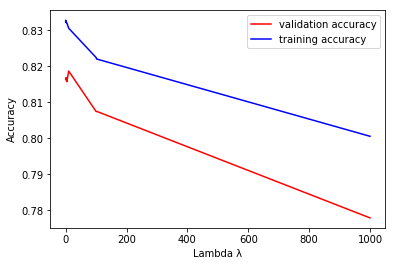

In [68]:
# PROBLEM 1, TASK 2 CODE GOES HERE

def logreg(X,y,Xvalid,yvalid):

    lamda = []
    output1 = []
    output2 = []
#
    lamda = [0.1,0.2,0.3,0.5,1,2,3,4,10,100,102,103,1000]
    c = [1/h for h in lamda]
    for i in c:
        log_reg = LogisticRegression(penalty='l2', C=i)
        log_reg.fit(X,y)
        y_pred = log_reg.predict(Xvalid)
        y_pred_train = log_reg.predict(X)
        score1 = metrics.accuracy_score(yvalid, y_pred)
        score2 = metrics.accuracy_score(y, y_pred_train)
        output1.append(score1)
        output2.append(score2)

    Best_Accuracy = max(output1)
    print("Best Accuracy value is:",Best_Accuracy)
    Best_lamda_Value = lamda[output1.index(max(output1))]
    print("Best Lambda value is:",Best_lamda_Value)
    plt.plot(lamda,output1,"r",label= "validation accuracy")
    plt.plot(lamda,output2,"b", label = "training accuracy")
    plt.xlabel("Lambda λ")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper right")
logreg(X,y,X_valid,y_valid)

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Best Accuracy value is: 0.9007464749792646
Best Lambda value is: 4


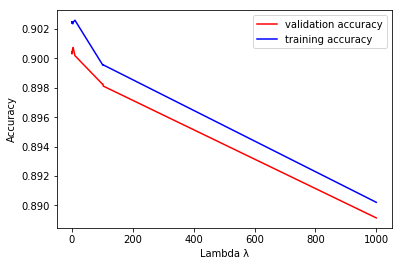

In [69]:
# PROBLEM 1, TASK 3 CODE GOES HERE
logreg(X_1,y_1,X_valid_1,y_valid_1)

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Maximum Accuracy: 0.903511197124689
Best lamda is 3
Best threshold is 0.4


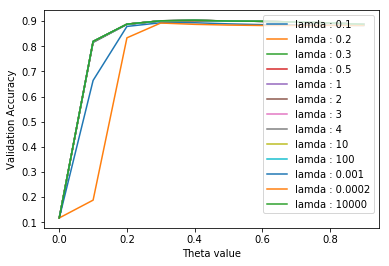

In [70]:
# PROBLEM 1, TASK 4 CODE GOES HERE

from sklearn.metrics import accuracy_score
#X_1,y_1,X_valid_1,y_valid_1

def theta_mod(Xe,ye,Xe_valid,ye_valid):
    lamda = [0.1,0.2,0.3,0.5,1,2,3,4,10,100,0.001,0.0002,10000]
    theta = [i*0.1 for i in range(10)]

    max_accuracy = 0
    for l in range(len(lamda)):
        val_acc = []
        theta_lat = []
        for t in range(len(theta)):
            log_reg_1 = LogisticRegression(penalty='l2', C=lamda[l])
            log_reg_1.fit(Xe,ye)
            y_valid_probs = log_reg_1.predict_proba(Xe_valid)[:,1]>=theta[t]
            y_valid_probs = y_valid_probs.astype(int)
            valid_accuracy = accuracy_score(ye_valid,y_valid_probs)
            val_acc.append(valid_accuracy)
            theta_lat.append(theta[t])
            if(max_accuracy < valid_accuracy):
                max_accuracy = valid_accuracy
                best_lamda = lamda[l]
                best_theta = theta[t]
        plt.plot(theta_lat,val_acc,label = ("lamda : "+str(lamda[l])))
        plt.xlabel("Theta value")
        plt.ylabel("Validation Accuracy")
        plt.legend(loc = "upper right")

    print("Maximum Accuracy:",max_accuracy)
    print("Best lamda is", best_lamda)
    print("Best threshold is", best_theta)
theta_mod(X_1,y_1,X_valid_1,y_valid_1)

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

## My Report:
The below mentioned documentation is based on the above and below(this particular cell) specified graphical results:<br>
Model A:<br>
We trained the Model A on the train_1 and validated on valid_1.<br>
Model B:<br>
We trained the Model B on the train_2 and validated on valid_2.<br>
Model C:<br>
By varying both the theta(probabilities) and lambda(regularization tuning parameter) we trained on train_2 and validated on valid_2<br>

Model A is trained on a training set train_1 which has less samples compared to the train_2, hence it is giving a less accuracy.
Model B is rather trained on 28934 samples so it is giving a better accuracy.
Coming to Model C, we are varying the threshold value theta and also the tuning parameter which gives further accurate model.
<br>
So as we can see below, I plotted few plots validating the test set, which provides further proof that our intuition with respect to the Models is correct.
<br>
In Graph 1:<br>
Here I compared the training accuray with the test accuracy, where I found that test accuracy is way low for the Model A.
<br>
In Graph 2:<br>
Here I compared the training accuracy with the test accuracy, where I found that test accuracy is doing better in Model B compared to Model A.
<br>
In Graph 3:<br>
Here I compared the training accuracy with the test accuracy, where I found that test accuracy is doing better in Model C with train_1 compared to Model A,B.
<br>
In Graph 4:<br>
Here I compared the training accuracy with the test accuracy, where I found that test accuracy is doing better in Model C with train_2 compared to Model A,B.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

Accuracy does the following steps:<br>
It counts the number of matched samples in the y_predicted and the y_true and divides it by the total number of samples.
This may not be a good accuracy since, the data is not symmetric. For the assymmetric data we need to look into the confusion matrix which provides the values of TP,FP,FN,FP.

Best Accuracy value is: 0.7611412141988279
Best Lambda value is: 0.1


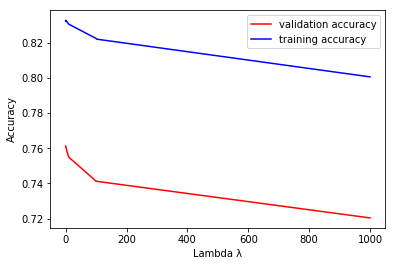

In [71]:
#Graph 1: Validating the given test set in Model A:
logreg(X_2,y_2,X_test,y_test)

Best Accuracy value is: 0.9018024991706293
Best Lambda value is: 0.1


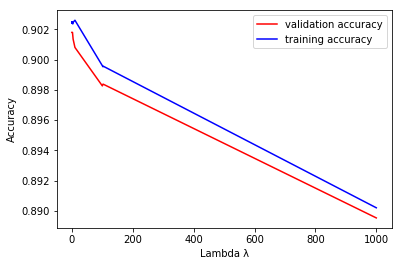

In [72]:
#Validating the given test set in Model B:
logreg(X_3,y_3,X_test_1,y_test_1)

Maximum Accuracy: 0.8941722879575362
Best lamda is 0.2
Best threshold is 0.9


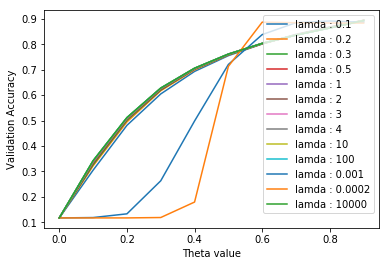

In [73]:
#Validating the given test set in Model C with train_1 dataset:
theta_mod(X_2,y_2,X_test,y_test)

Maximum Accuracy: 0.9045670684507354
Best lamda is 2
Best Theta value is 0.4


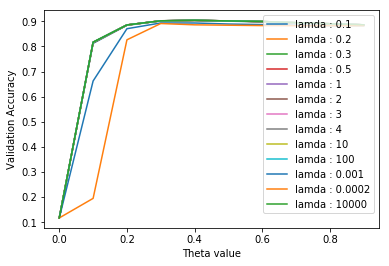

In [65]:
#Validating the given test set in Model C with train_2 dataset:
theta_mod(X_3,y_3,X_test_1,y_test_1)

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

[ 0.  -1.5  0.   2.5]
[-1.         -0.76742684 -0.55882328 -0.37316934 -0.20944504 -0.0666304
  0.05629457  0.16034985  0.24655543  0.31593129  0.3694974   0.40827376
  0.43328035  0.44553715  0.44606414  0.43588131  0.41600864  0.38746611
  0.3512737   0.30845141  0.26001921  0.20699708  0.15040502  0.09126299
  0.030591   -0.030591   -0.09126299 -0.15040502 -0.20699708 -0.26001921
 -0.30845141 -0.3512737  -0.38746611 -0.41600864 -0.43588131 -0.44606414
 -0.44553715 -0.43328035 -0.40827376 -0.3694974  -0.31593129 -0.24655543
 -0.16034985 -0.05629457  0.0666304   0.20944504  0.37316934  0.55882328
  0.76742684  1.        ]
[ 3.75000000e-01  2.42861287e-16 -3.75000000e+00  4.85722573e-16
  4.37500000e+00]
[ 1.          0.62814328  0.32428544  0.08172372 -0.10595318 -0.24486517
 -0.34084073 -0.39941691 -0.42583933 -0.4250622  -0.4017483  -0.36026898
 -0.30470419 -0.23884242 -0.16618076 -0.08992487 -0.012989    0.06200405
  0.13272288  0.19712753  0.25346946  0.30029155  0.33642809  0.361

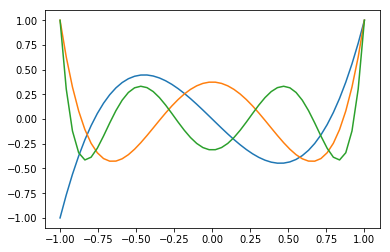

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre


def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    print(w)
    x = np.linspace(low,high)
    y = 0
    for i in range(len(w)):
        y+=w[i]*(x**i)
    print(y)    
    plt.plot(x,y)
    

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [99]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    print(w)
    X_train = np.random.uniform(-1,1,n_train)
    X_train_1 = [i for i in X_train]
    X_test = np.random.uniform(-1,1,n_test)
    X_test_1 = [i for i in X_test]
    y_train = []
    y_test = []
    for t1,t2 in zip(range(0,n_train),range(0,n_test)):
        sum1 = 0
        sum2 = 0
        for weight,d in zip(w,range(0,degree+1)):
            sum1 += weight * (X_train[t1] ** d)
            sum2 += weight * (X_test[t2] ** d)
        Noise_train = np.random.normal(0,sigma)
        Noise_test = np.random.normal(0,sigma)
        sum1 += Noise_train
        sum2 += Noise_test
        y_train.append(sum1)
        y_test.append(sum2)
    return X_train_1, y_train, X_test_1, y_test

def plot_function(x,y,color=" "):
    if color==" ":
        plt.plot(x,y)
    else:
        plt.plot(x,y,color)

generate_dataset(3,5,5,1)

[ 0.  -1.5  0.   2.5]


([0.11537898303214633,
  0.531879931672318,
  -0.5140840289077866,
  -0.15459202664288596,
  -0.09693633475367869],
 [-0.5420339344094193,
  -0.9793497790266776,
  -0.3245588862606547,
  1.144699861749166,
  -0.2765925462321198],
 [-0.21226245369333085,
  0.7179475255800865,
  -0.29867709287623234,
  0.37111478128732545,
  0.9705308658079217],
 [1.361418861856932,
  -0.05806003606575791,
  0.9004470464135816,
  -1.0693438044111203,
  1.6525028598809968])

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.


Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

In [108]:
#Q1:
generate_dataset(10,20,20,0.2)

[-2.46093750e-01  5.47730467e-16  1.35351562e+01 -1.00156428e-14
 -1.17304687e+02 -2.80437999e-13  3.51914063e+02 -2.80437999e-13
 -4.27324219e+02 -4.00625713e-14  1.80425781e+02]


([-0.08365175097036093,
  -0.7273445455509089,
  0.6339640330407945,
  -0.7507544936610535,
  -0.14020669610281455,
  0.5905613944577184,
  -0.4174044026025341,
  -0.8043990934556726,
  0.5822869260422887,
  -0.2783494195815921,
  -0.9250536702569296,
  0.2815635376568535,
  0.05114718336313584,
  -0.3326105951991749,
  0.46736550260427046,
  0.2842060004512825,
  -0.2709529636805994,
  -0.3738720514571925,
  -0.19706784526601173,
  -0.6278358590775714],
 [-0.09927064966126817,
  0.4454662450334395,
  0.09443399737625574,
  0.22282195948593997,
  -0.0009528842758270185,
  -0.16617465855433367,
  0.49348211546687126,
  0.45134437261132127,
  -0.43615684144685474,
  0.15709853464491652,
  -0.43577490867339025,
  0.4398664136118532,
  0.08030329686967577,
  0.5070996463371723,
  -0.04510368846272798,
  0.3814022125182688,
  -0.11597400897148818,
  0.08257558773968836,
  0.2579355490571623,
  -0.08858108105433432],
 [0.2758588015681329,
  -0.606009352647191,
  0.10067601736833232,
  -0.442

[-2.46093750e-01  5.47730467e-16  1.35351562e+01 -1.00156428e-14
 -1.17304687e+02 -2.80437999e-13  3.51914063e+02 -2.80437999e-13
 -4.27324219e+02 -4.00625713e-14  1.80425781e+02]
[-2.46093750e-01  5.47730467e-16  1.35351562e+01 -1.00156428e-14
 -1.17304687e+02 -2.80437999e-13  3.51914063e+02 -2.80437999e-13
 -4.27324219e+02 -4.00625713e-14  1.80425781e+02]
[ 1.         -0.26572506 -0.37052696 -0.09410363  0.17897506  0.30567617
  0.27666817  0.14400757 -0.02424987 -0.16964344 -0.25492954 -0.26639689
 -0.21052652 -0.10776884  0.01454339  0.12876316  0.21212166  0.25011424
  0.23798225  0.18044222  0.08998765 -0.01580494 -0.11748677 -0.19698783
 -0.24047677 -0.24047677 -0.19698783 -0.11748677 -0.01580494  0.08998765
  0.18044222  0.23798225  0.25011424  0.21212166  0.12876316  0.01454339
 -0.10776884 -0.21052652 -0.26639689 -0.25492954 -0.16964344 -0.02424987
  0.14400757  0.27666817  0.30567617  0.17897506 -0.09410363 -0.37052696
 -0.26572506  1.        ]


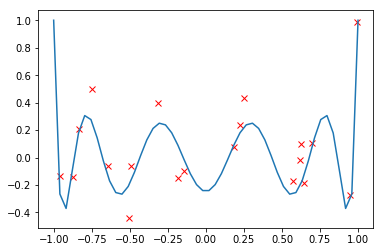

In [109]:
#Q2:
X_train, y_train, X_test, y_test=generate_dataset(10,20,20,0.2)
plot_function(X_train,y_train,color="rx")
visualize_function(10,-1,1)

In [110]:
#Q3
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

def polyfit(degree, X_train,y_train,X_test,y_test):
    Linear = sklearn.linear_model.LinearRegression()
    polyGen = sklearn.preprocessing.PolynomialFeatures(degree)
    X_train_transform = polyGen.fit_transform(np.asarray(X_train).reshape(-1,1))
    X_test_transform = polyGen.fit_transform(np.asarray(X_test).reshape(-1,1))
    Linear.fit(X_train_transform, y_train)
    y_train_pred = Linear.predict(X_train_transform)
    y_test_pred = Linear.predict(X_test_transform)
    trainError = mse(y_train,y_train_pred)
    testingError = mse(y_test,y_test_pred)
    return trainError,testingError


modA = polyfit(2,X_train, y_train, X_test, y_test)
modB = polyfit(10,X_train, y_train, X_test, y_test)

d = {'Training Error': [modA[0],modB[0]], 'Testing Error': [modA[1], modB[1]]}
df = pd.DataFrame(data=d, index = ["Model A","Model B"])
print(df)

         Training Error  Testing Error
Model A        0.095937       0.059121
Model B        0.008685       0.159562


## Answer:
Degree 10 polynomial, that we are trying to fit is giving high test error. Since data is being overfitted here resulting in high test error. When we look into the degree 2 it is not much affected by noise as it is not fitting all the points exactly. Bias for degree 2 polynomial model is high but the variance is less.
For degree 10 polynomial model, bias is low and variance is high.

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

[ 0.00000000e+00  5.38218804e+00 -1.43025641e-14 -1.85506081e+03
  8.57391044e-11  1.90885758e+05  1.98011563e-08 -9.27159394e+06
 -9.12337300e-07  2.59347086e+08 -1.38375323e-04 -4.66824755e+09
 -1.31112618e-03  5.79939984e+10  1.38348448e-01 -5.21393662e+11
  4.65746830e+00  3.50790589e+12  6.52209373e+01 -1.80934093e+13
  4.96511806e+02  7.28044327e+13  2.08151353e+03 -2.31362703e+14
  3.41611277e+03  5.85347639e+14 -5.35013894e+03 -1.18403653e+15
 -2.95600418e+04  1.91603942e+15 -4.41383527e+04 -2.47230892e+15
 -2.88969567e+04  2.52381536e+15 -8.18447967e+03 -2.01056887e+15
 -1.10693108e+03  1.22264323e+15 -1.88374542e+02 -5.47796969e+14
 -2.52242402e+01  1.70351496e+14 -6.50001203e-01 -3.28252053e+13
  7.86291778e-03  2.95095280e+12]
[ 0.00000000e+00  5.38218804e+00 -1.43025641e-14 -1.85506081e+03
  8.57391044e-11  1.90885758e+05  1.98011563e-08 -9.27159394e+06
 -9.12337300e-07  2.59347086e+08 -1.38375323e-04 -4.66824755e+09
 -1.31112618e-03  5.79939984e+10  1.38348448e-01 -5.2139

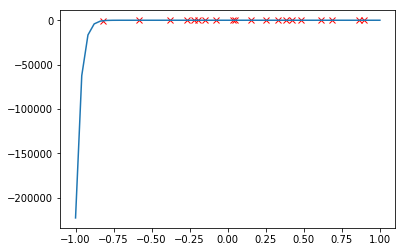

In [113]:
#No noise hence sigma is 0
X_train, y_train, X_test, y_test=generate_dataset(45,20,20,0)
plot_function(X_train,y_train,color="rx")
visualize_function(45,-1,1)

In [112]:
#Model A
modA = polyfit(2,X_train, y_train, X_test, y_test)


#Model B
modB = polyfit(10,X_train, y_train, X_test, y_test)

#Table formation for errors
d = {'Training Error': [modA[0],modB[0]], 'Testing Error': [modA[1], modB[1]]}
df = pd.DataFrame(data=d, index = ["Model A","Model B"])
print(df)

         Training Error  Testing Error
Model A    4.437533e+07   1.187666e+07
Model B    1.188595e+04   6.535917e+08


## Answer
Noise is not being added to the model. Training data with degree 45 is being generated. The results are not suprising since higher the degree means we are overfitting the model to the training data and hence the test error is huge.

